In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score, auc

In [2]:
df = pd.read_csv("Bank_Transaction_Risk_Dataset.csv")

In [3]:
df.head()

,Transaction_Amount,Account_Balance,Customer_Tenure_Months,Daily_Transaction_Count,Transaction_Hour,Failed_Login_Attempts,Transaction_Type,Merchant_Category,Device_Type,Country,Account_Type,KYC_Status,High_Risk_Transaction
0,5993.43,3684.99,42,3,19,1,transfer,gambling,mobile,IN,savings,unverified,No
1,4723.47,35809.54,115,3,9,0,Cash_Out,gambling,mobile,IN,current,verified,No
2,6295.38,5628.33,78,6,22,0,transfer,gambling,mobile,IN,current,Verified,No
3,8046.06,7777.62,10,5,8,0,cash_out,travel,desktop,india,savings,verified,No
4,4531.69,9775.65,111,2,1,0,TRANSFER,GAMBLING,desktop,BD,business,Verified,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transaction_Amount       790 non-null    float64
 1   Account_Balance          790 non-null    float64
 2   Customer_Tenure_Months   800 non-null    int64  
 3   Daily_Transaction_Count  800 non-null    int64  
 4   Transaction_Hour         800 non-null    int64  
 5   Failed_Login_Attempts    800 non-null    int64  
 6   Transaction_Type         790 non-null    object 
 7   Merchant_Category        800 non-null    object 
 8   Device_Type              790 non-null    object 
 9   Country                  800 non-null    object 
 10  Account_Type             800 non-null    object 
 11  KYC_Status               800 non-null    object 
 12  High_Risk_Transaction    800 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 81.4+ KB


In [5]:
#seeing duplicate value
df.duplicated().sum()

np.int64(0)

In [11]:
#seeing NAN value
df.isna().sum()

Transaction_Amount         0
Account_Balance            0
Customer_Tenure_Months     0
Daily_Transaction_Count    0
Transaction_Hour           0
Failed_Login_Attempts      0
Transaction_Type           0
Merchant_Category          0
Device_Type                0
Country                    0
Account_Type               0
KYC_Status                 0
High_Risk_Transaction      0
dtype: int64

In [7]:
df['Transaction_Amount'] = df['Transaction_Amount'].fillna(df['Transaction_Amount'].mean())

In [8]:
df['Account_Balance'] = df['Account_Balance'].fillna(df['Account_Balance'].mean())

In [9]:
df['Transaction_Type'] = df['Transaction_Type'].ffill()

In [10]:
df['Device_Type'] = df['Device_Type'].bfill()

In [12]:
le = LabelEncoder()
mms = MinMaxScaler()

In [14]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        df[col] = mms.fit_transform(df[[col]])
    else:
        df[col] = le.fit_transform(df[col])

In [15]:
df.head()

,Transaction_Amount,Account_Balance,Customer_Tenure_Months,Daily_Transaction_Count,Transaction_Hour,Failed_Login_Attempts,Transaction_Type,Merchant_Category,Device_Type,Country,Account_Type,KYC_Status,High_Risk_Transaction
0,0.096349,0.104552,0.347458,0.3,0.826087,0.25,4,3,2,2,2,1,0
1,0.079982,0.295720,0.966102,0.3,0.391304,0.00,0,3,2,2,1,2,0
2,0.100241,0.116117,0.652542,0.6,0.956522,0.00,4,3,2,2,1,0,0
3,0.122804,0.128907,0.076271,0.5,0.347826,0.00,3,4,1,3,2,2,0
4,0.077511,0.140797,0.932203,0.2,0.043478,0.00,1,0,1,0,0,0,0


Transaction_Amount


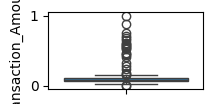

Account_Balance


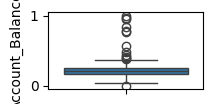

Customer_Tenure_Months


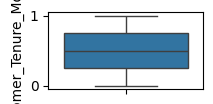

Daily_Transaction_Count


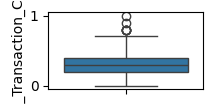

Transaction_Hour


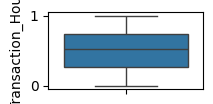

Failed_Login_Attempts


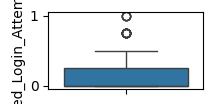

Transaction_Type


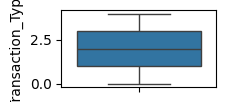

Merchant_Category


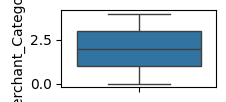

Device_Type


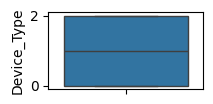

Country


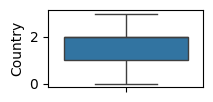

Account_Type


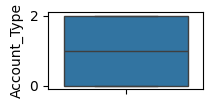

KYC_Status


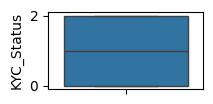

High_Risk_Transaction


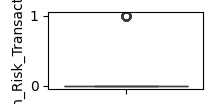

In [16]:
for col2 in df.columns:
    print(col2)
    plt.figure(figsize=(2,1))
    sns.boxplot(df[col2])
    plt.show()